In [1]:
'''Calculation of the Lennard-Jones potential of a specific atom'''
import numpy as np

class atom_prop():
    def __init__(self,sigma,epsilon):
        self.sig = sigma
        self.eps = epsilon
        
def LJ_pot(atom,r):
    sig = atom.sig
    eps = atom.eps
    return 4*eps*((sig/r)**12-(sig/r)**6)

def LJ_pot_DL(r): # Gives energy in units of U/epsilon for r_tilde = r/sigma
    u = np.zeros(r.shape)
    u[r!=0] = 4*((1/r[r!=0])**12-(1/r[r!=0])**6)
    u[r==0] = 0
    return u

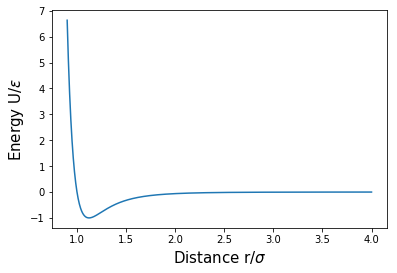

In [2]:
# Plotting of the potential of Argon (Ar)
import matplotlib.pyplot as plt
%matplotlib inline

kb = 1.38e-23
Ar = atom_prop(3.405e-10,119.8*kb)

x = np.linspace(0.9,4,1000)
U = LJ_pot_DL(x)

plt.plot(x,U)
plt.xlabel(r'Distance r/$\sigma$',size=15)
plt.ylabel(r'Energy U/$\epsilon$',size=15)

In [3]:
# Particle generation
N = 3 # Number of particles
L = 10 # Size box in units of sigma
dim = 2 # Dimensions of problem

# Determination of startposition
Location = np.random.random((dim,N))*L # Each row is different coordinate (x,y,z) and each column is different particle

print(Location)

#Determination of start velocity
v = np.zeros((dim,N),dtype=float) #initial velocity of the particles in dim-directions

 

[[ 8.26000351  9.12942791  5.31579076]
 [ 5.69652939  4.44354599  2.49475509]]


In [4]:
# Calculation of minimal distance of particles

# Mirror cubes (Translation of original cube)
Locationxyz = np.zeros((dim,N,N)) # Gives the matrix which contains the coordinate of each dimension dim, for all particles wrt a certain particle. (elke kolom geeft coordinaten van alle deeltjes tov 1 deeltje)
delta_tot = np.zeros((dim,N,N))

r = np.zeros((N,N))
NN_max_dist = L/2

for i in range(dim):
    Locationxyz[i] = np.tile(Location[i,:].reshape(N,1),N)
    delta = (Location[i,:].reshape(1,N)-Location[i,:].reshape(N,1))
    
    # Determination of the location of the image particles
    Locationxyz[i][delta > NN_max_dist] = Locationxyz[i][delta > NN_max_dist] + L
    Locationxyz[i][delta < -NN_max_dist] = Locationxyz[i][delta < -NN_max_dist] - L
    
    # Determination of the image deltas
    delta_abs = abs(delta)
    delta_abs[delta_abs > NN_max_dist] = L - delta_abs[delta > NN_max_dist]
    
    delta_tot[i] = delta
    delta_tot[i][delta > NN_max_dist] = -L + delta_tot[i][delta > NN_max_dist] 
    delta_tot[i][delta < -NN_max_dist] = delta_tot[i][delta < -NN_max_dist] + L
    
    r += delta_abs**2
    
r = np.sqrt(r)

U = LJ_pot_DL(r)

In [5]:
print("delta_tot",delta_tot)
print("Locationxyz = ",Locationxyz)
print("r = ",r);print("U = ",U)

delta_tot [[[ 0.          0.86942439 -2.94421275]
  [-0.86942439  0.         -3.81363714]
  [ 2.94421275  3.81363714  0.        ]]

 [[ 0.         -1.2529834  -3.20177431]
  [ 1.2529834   0.         -1.9487909 ]
  [ 3.20177431  1.9487909   0.        ]]]
Locationxyz =  [[[ 8.26000351  8.26000351  8.26000351]
  [ 9.12942791  9.12942791  9.12942791]
  [ 5.31579076  5.31579076  5.31579076]]

 [[ 5.69652939  5.69652939  5.69652939]
  [ 4.44354599  4.44354599  4.44354599]
  [ 2.49475509  2.49475509  2.49475509]]]
r =  [[ 0.          1.52507908  4.3496836 ]
 [ 1.52507908  0.          4.28271108]
 [ 4.3496836   4.28271108  0.        ]]
U =  [[ 0.         -0.29264431 -0.00059054]
 [-0.29264431  0.         -0.00064815]
 [-0.00059054 -0.00064815  0.        ]]


## Steps to be taken next
    1. Determination of the gradient of U
    2. Determination of the forces F

In [6]:
# Definition of the gradient of the LJ_pot
def grad_pot(r):
    grad_u = np.zeros(r.shape)
    grad_u[r!=0] = -24*(2*(1/r[r!=0])**13-(1/r[r!=0])**7)
    grad_u[r==0] = 0
    return grad_u
'''Function which gives the gradient of the LJ-pot. Input: absolute distance between the particles'''

'Function which gives the gradient of the LJ-pot. Input: absolute distance between the particles'

In [7]:
# Definition of the forcing

def force_LJ(dim,N,r,delta_tot):
    F = np.zeros((dim,N,N),dtype=float)
    for i in range(dim):
        F[i][r!=0] = -grad_pot(r[r!=0])/(r[r!=0])*delta_tot[i][r!=0]
    #print(F)
    return F
'''In this function the forcing due to the Lennard-Jones potential is calculated. Input: # of dimensions, # of particles, absolute distance between particles, distance vector between particles'''

'In this function the forcing due to the Lennard-Jones potential is calculated. Input: # of dimensions, # of particles, absolute distance between particles, distance vector between particles'

In [8]:
# Calculation of the forcing
F = force_LJ(dim,N,r,delta_tot)
print(F)

[[[  0.00000000e+00  -5.99684866e-01   5.51303591e-04]
  [  5.99684866e-01   0.00000000e+00   8.08461979e-04]
  [ -5.51303591e-04  -8.08461979e-04   0.00000000e+00]]

 [[  0.00000000e+00   8.64244426e-01   5.99531970e-04]
  [ -8.64244426e-01   0.00000000e+00   4.13128803e-04]
  [ -5.99531970e-04  -4.13128803e-04   0.00000000e+00]]]


In [ ]:
#Using the functions from above

